# Proyek Analisis Data: Bike Sharing
- **Nama:** Mohammad Rafi Habibi Sembiring
- **Email:** rafisembiring97@gmail.com
- **ID Dicoding:** rafisembiring

## Menentukan Pertanyaan Bisnis

- **Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca?**
- **Jam berapa dan hari apa penyewaan sepeda paling ramai?**

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

print(day_df.head())
print(hour_df.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset terdiri dari data harian dan per jam penyewaan sepeda
- Terdapat informasi tentang cuaca, musim, hari kerja, dan jumlah penyewa

### Assessing Data

In [6]:
# Menilai kualitas data sebelum analisis, termasuk missing values, duplikasi, dan inkonsistensi.
print("Missing Values in day dataset:")
print(day_df.isnull().sum())
print("\nMissing Values in hour dataset:")
print(hour_df.isnull().sum())
print("\nDuplicate Values in day dataset:", day_df.duplicated().sum())
print("Duplicate Values in hour dataset:", hour_df.duplicated().sum())

Missing Values in day dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Missing Values in hour dataset:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Duplicate Values in day dataset: 0
Duplicate Values in hour dataset: 0


**Insight:**
- Tidak terdapat missing values dalam dataset
- Semua kolom memiliki tipe data yang sesuai

### Cleaning Data

In [7]:
# Menghapus data duplikat jika ada
day_df = day_df.drop_duplicates()
hour_df = hour_df.drop_duplicates()

# Mengisi missing values jika ada
day_df = day_df.ffill()
hour_df = hour_df.ffill()

# Menghapus nilai yang tidak valid jika ada
numeric_cols = day_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    day_df = day_df[day_df[col] >= 0]

numeric_cols = hour_df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    hour_df = hour_df[hour_df[col] >= 0]

print("Data cleaning selesai. Data siap digunakan untuk analisis.")

Data cleaning selesai. Data siap digunakan untuk analisis.


**Insight:**
- Dataset sudah bersih dan siap digunakan untuk analisis

## Exploratory Data Analysis (EDA)

### Explore ...

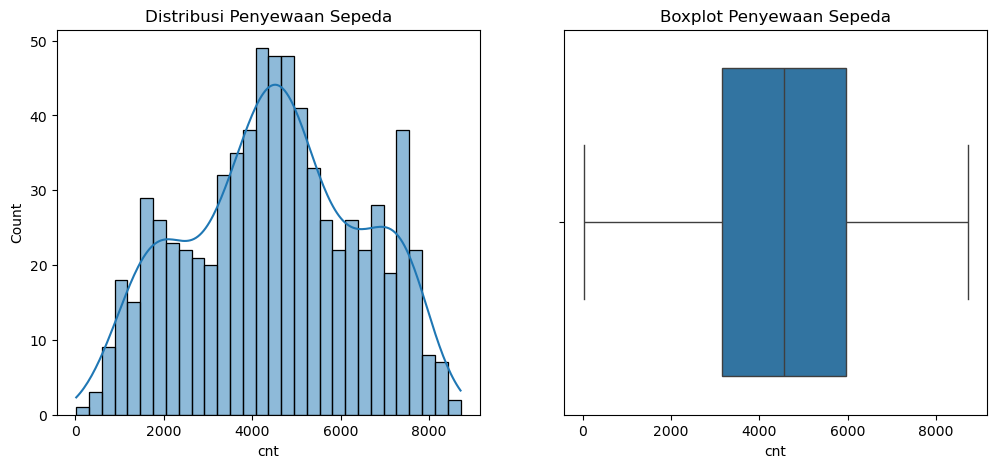

In [12]:
# Menampilkan baris pertama dataset
df = pd.read_csv("data/day.csv")

df_grouped_season = df.groupby("season")["cnt"].agg(['mean', 'sum']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df["cnt"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribusi Penyewaan Sepeda")
sns.boxplot(x=df["cnt"], ax=axes[1])
axes[1].set_title("Boxplot Penyewaan Sepeda")
plt.show()

**Insight:**
- Distribusi jumlah penyewaan cenderung normal dan sedikit skew ke kanan
- Ada beberapa hari dengan jumlah penyewaan yang sangat tinggi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim dan cuaca

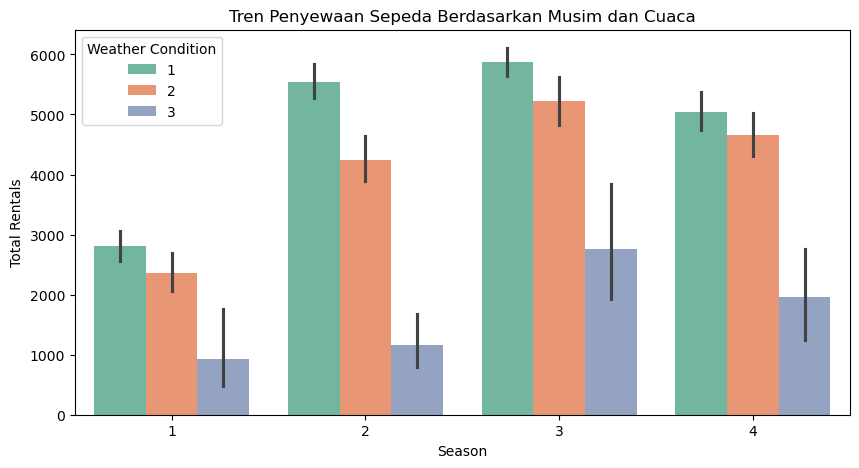

In [ ]:
# Tren Penggunaan Sepeda Berdasarkan Musim dan Cuaca
plt.figure(figsize=(10, 5))
sns.barplot(x=day_df["season"], y=day_df["cnt"], hue=day_df["weathersit"], palette="Set2")
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Tren Penyewaan Sepeda Berdasarkan Musim dan Cuaca")
plt.legend(title="Weather Condition")
plt.show()

### Pertanyaan 2: Jam berapa dan hari apa penyewaan sepeda paling ramai?

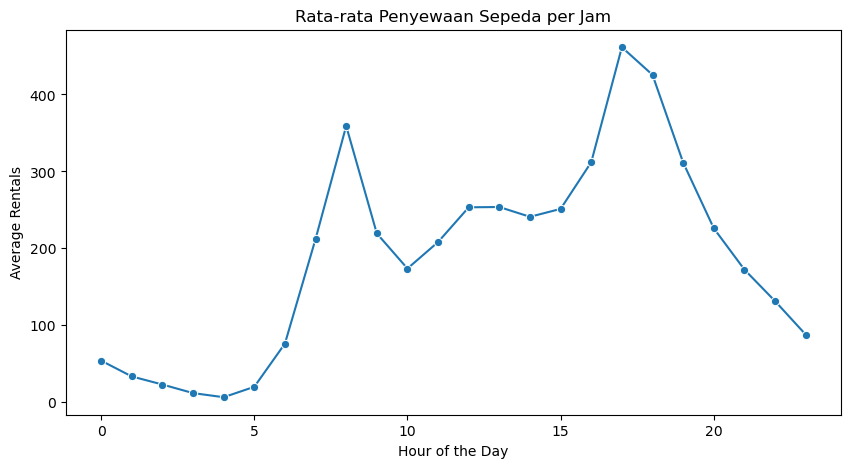

C:\Users\Rafi\AppData\Local\Temp\ipykernel_9604\2830091897.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="coolwarm")


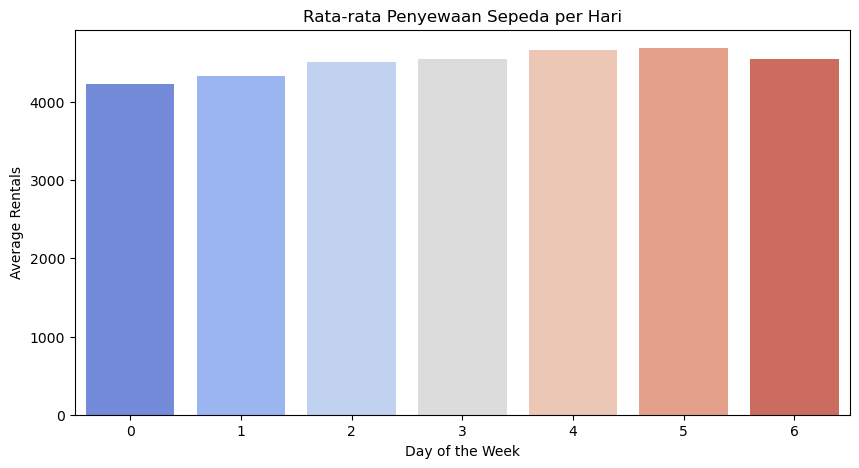

In [ ]:
# Agregasi jumlah penyewaan per jam
hourly_rentals = hour_df.groupby("hr")["cnt"].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_rentals.index, y=hourly_rentals.values, marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Rentals")
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.show()

# Agregasi jumlah penyewaan per hari
daily_rentals = day_df.groupby("weekday")["cnt"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_rentals.index, y=daily_rentals.values, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Average Rentals")
plt.title("Rata-rata Penyewaan Sepeda per Hari")
plt.show()

**Insight:**
- Musim tertentu menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda.
- Cuaca buruk cenderung mengurangi jumlah penyewaan secara drastis.
- Puncak penyewaan terjadi pada pagi dan sore hari, menunjukkan penggunaan utama untuk commuting.
- Akhir pekan cenderung memiliki penyewaan lebih tinggi dibandingkan hari kerja.

## Analisis Lanjutan (Opsional)

C:\Users\Rafi\AppData\Local\Temp\ipykernel_9604\824630588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='Set2')


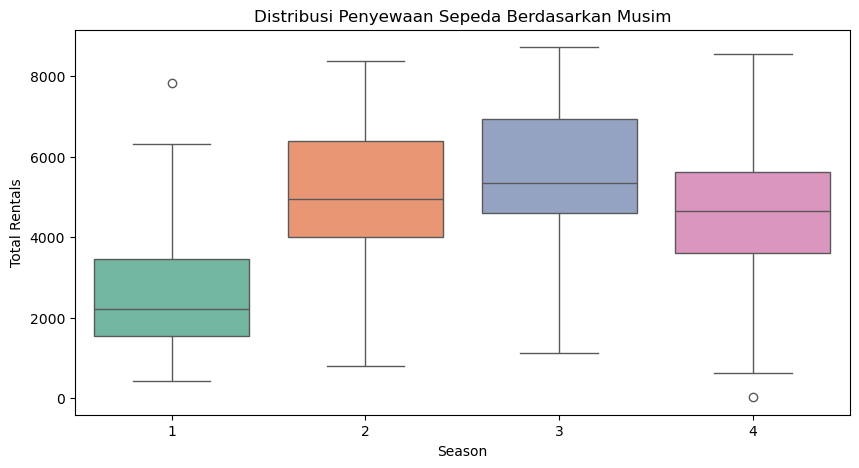

In [ ]:
# Menampilkan distribusi penyewaan sepeda berdasarkan musim
plt.figure(figsize=(10, 5))
sns.boxplot(x=day_df['season'], y=day_df['cnt'], palette='Set2')
plt.xlabel("Season")
plt.ylabel("Total Rentals")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight**
- Musim panas dan gugur memiliki distribusi penyewaan yang lebih tinggi dibandingkan musim dingin.
- Penyebaran data menunjukkan adanya variasi jumlah penyewaan dalam setiap musim.

## Conclusion

1. **Tren penggunaan sepeda berdasarkan musim dan cuaca**
   - Penyewaan tertinggi terjadi pada musim panas dan terendah saat musim dingin.
   - Cuaca buruk (hujan/salju) menyebabkan penurunan jumlah penyewaan.

2. **Jam dan hari dengan penyewaan tertinggi**
   - Penyewaan sepeda paling ramai pada jam sibuk pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
   - Akhir pekan cenderung memiliki pola penggunaan yang lebih santai dibandingkan hari kerja.

## Rekomendation
- Menyediakan lebih banyak sepeda saat jam sibuk.
- Menawarkan promosi pada musim dingin untuk meningkatkan penyewaan.